In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('/Titanic-Dataset.csv')  # Replace with your actual file


In [3]:
df.info()      # Gives column names, data types, and missing values
df.head()      # Shows the first few rows
df.isnull().sum()  # Summarizes missing values column-wise


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [5]:
df.fillna({'Age': df['Age'].mean(), 'Embarked': df['Embarked'].mode()[0]}, inplace=True)


In [6]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])


<Axes: >

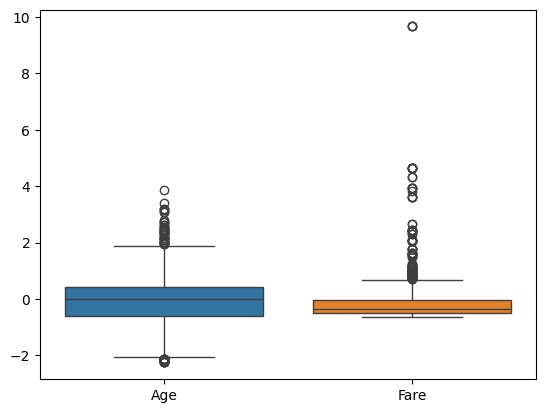

In [8]:
sns.boxplot(data=df[['Age', 'Fare']])



In [9]:
df.info()       # Recheck structure
df.describe()   # Recheck summary stats


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Sex_male     891 non-null    bool   
 10  Embarked_Q   891 non-null    bool   
 11  Embarked_S   891 non-null    bool   
dtypes: bool(3), float64(2), int64(5), object(2)
memory usage: 65.4+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,8.910000e+02,891.000000,891.000000,8.910000e+02
mean,446.000000,0.383838,2.308642,2.232906e-16,0.523008,0.381594,3.987333e-18
std,257.353842,0.486592,0.836071,1.000562e+00,1.102743,0.806057,1.000562e+00
min,1.000000,0.000000,1.000000,-2.253155e+00,0.000000,0.000000,-6.484217e-01
25%,223.500000,0.000000,2.000000,-5.924806e-01,0.000000,0.000000,-4.891482e-01
50%,446.000000,0.000000,3.000000,0.000000e+00,0.000000,0.000000,-3.573909e-01
75%,668.500000,1.000000,3.000000,4.079260e-01,1.000000,0.000000,-2.424635e-02
max,891.000000,1.000000,3.000000,3.870872e+00,8.000000,6.000000,9.667167e+00
